<a href="https://colab.research.google.com/github/dustiny5/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/module3-reshape-data/LS_DS_123_Reshape_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Reshape data

Objectives
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- pandas documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

## Why reshape data?

#### Some libraries prefer data in different formats

For example, the Seaborn data visualization library prefers data in "Tidy" format often (but not always).

> "[Seaborn will be most powerful when your datasets have a particular organization.](https://seaborn.pydata.org/introduction.html#organizing-datasets) This format ia alternately called “long-form” or “tidy” data and is described in detail by Hadley Wickham. The rules can be simply stated:

> - Each variable is a column
- Each observation is a row

> A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

#### Data science is often about putting square pegs in round holes

Here's an inspiring [video clip from _Apollo 13_](https://www.youtube.com/watch?v=ry55--J4_VQ): “Invent a way to put a square peg in a round hole.” It's a good metaphor for data wrangling!

## Upgrade Seaborn

Run the cell below which upgrades Seaborn and automatically restarts your Google Colab Runtime.

In [0]:
!pip install seaborn --upgrade
import os
os.kill(os.getpid(), 9)

    100% |████████████████████████████████| 215kB 23.7MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


## Hadley Wickham's Examples

From his paper, [Tidy Data](http://vita.had.co.nz/papers/tidy-data.html)

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

"Table 1 provides some data about an imaginary experiment in a format commonly seen in the wild. 

The table has two columns and three rows, and both rows and columns are labelled."

In [4]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


"There are many ways to structure the same underlying data. 

Table 2 shows the same data as Table 1, but the rows and columns have been transposed. The data is the same, but the layout is different."

In [5]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


"Table 3 reorganises Table 1 to make the values, variables and obserations more clear.

Table 3 is the tidy version of Table 1. Each row represents an observation, the result of one treatment on one person, and each column is a variable."

| name         | trt | result |
|--------------|-----|--------|
| John Smith   | a   | -      |
| Jane Doe     | a   | 16     |
| Mary Johnson | a   | 3      |
| John Smith   | b   | 2      |
| Jane Doe     | b   | 11     |
| Mary Johnson | b   | 1      |

## Table 1 --> Tidy

We can use the pandas `melt` function to reshape Table 1 into Tidy format.

In [6]:
table1.columns.tolist()

['treatmenta', 'treatmentb']

In [7]:
table1.index.tolist()

['John Smith', 'Jane Doe', 'Mary Johnson']

In [8]:
tidy = table1.reset_index().melt(id_vars='index')

tidy = tidy.rename(columns={'index':'name', 'variable':'trt', 'value':'result'})

tidy['trt'] = tidy['trt'].str.replace('treatment', '')
#tidy['trt'] = tidy['trt'].str.strip('tremn') Removes begining and ending of the string that has 'tremn'

#Change to binary for trt feature a= 0 & b = 1
tidy['trt'].replace('a', 0).replace('b', 1) #Can replace using dictionary

tidy['trt'].map({'a':0, 'b':1})

(tidy['trt'] == 'b').astype(int) # Change boolean to integers true=1, false=0 // Use astype for whole column use int() for single line code

tidy['trt'].apply(lambda x: ord(x) - ord('a'))#ord returns the unicode number
tidy

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


## Table 2 --> Tidy

In [9]:
#Table 2 dataframe
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [10]:
#Reset index
#Melt the data and set its attribute, id_vars='index', (Displays individual treatment and pairs it with the name and result)
#Rename the columns
tidy2 = (table2
        .reset_index()
        .melt(id_vars='index')
        .rename(columns={'index': 'trt',
                     'variable': 'name',
                     'value': 'result'}))

#Use string method to replace 'treatment' with an empty string
tidy2['trt'] = tidy2['trt'].str.replace('treatment', '')
tidy2

,trt,name,result
0,a,John Smith,NaN
1,b,John Smith,2.0
2,a,Jane Doe,16.0
3,b,Jane Doe,11.0
4,a,Mary Johnson,3.0
5,b,Mary Johnson,1.0


## Tidy --> Table 1

The `pivot_table` function is the inverse of `melt`.

In [11]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [12]:
tidy

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


In [13]:
tidy.pivot_table(index='name', columns='trt', values='result')

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


## Tidy --> Table 2

In [14]:
#Tidy2 data from Table2
tidy2

,trt,name,result
0,a,John Smith,NaN
1,b,John Smith,2.0
2,a,Jane Doe,16.0
3,b,Jane Doe,11.0
4,a,Mary Johnson,3.0
5,b,Mary Johnson,1.0


In [15]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [16]:
tidy2_pivot = tidy2.pivot_table(index='trt', columns='name', values='result', margins_name='name')
tidy2_pivot

name,Jane Doe,John Smith,Mary Johnson
trt,,,
a,16.0,NaN,3.0
b,11.0,2.0,1.0


In [17]:
#Delete name from columns(name)
tidy2_pivot.columns.name = None

#Delete name from index(trt)
tidy2_pivot.index.name = None

tidy2_pivot

,Jane Doe,John Smith,Mary Johnson
a,16.0,NaN,3.0
b,11.0,2.0,1.0


In [18]:
#Rename index
tidy2_pivot = tidy2_pivot.rename(index={'a':'treatmenta', 'b':'treatmentb'})

tidy2_pivot

,Jane Doe,John Smith,Mary Johnson
treatmenta,16.0,NaN,3.0
treatmentb,11.0,2.0,1.0


In [19]:
#Original order of columns from table 2
column_order = table2.columns

#Reorganize using reindex method and pass in the column_order for colums
tidy2_pivot = tidy2_pivot.reindex(column_order, axis=1)

tidy2_pivot

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


#Seaborn example
- Each variable is a column
- Each observation is a row

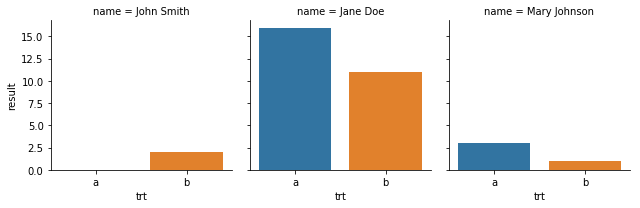

In [20]:
sns.catplot(x='trt', y='result', col='name', kind='bar', data=tidy, height=3);

## Load Instacart data

Let's return to the dataset of [3 Million Instacart Orders](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)

If necessary, uncomment and run the cells below to re-download and extract the data

In [21]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-03-27 21:47:08--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.237.117
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.237.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  20.2MB/s    in 7.7s    

2019-03-27 21:47:16 (25.5 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [22]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


Run these cells to load the data

In [24]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [0]:
products = pd.read_csv('products.csv')

order_products = pd.concat([pd.read_csv('order_products__prior.csv'), 
                            pd.read_csv('order_products__train.csv')])

orders = pd.read_csv('orders.csv')

## Goal: Reproduce part of this example

Instead of a plot with 50 products, we'll just do two — the first products from each list
- Half And Half Ultra Pasteurized
- Half Baked Frozen Yogurt

In [0]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
example = Image(url=url, width=600)

display(example)

So, given a `product_name` we need to calculate its `order_hour_of_day` pattern.

## Subset and Merge

In [0]:
product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

In [27]:
products.columns.tolist()

['product_id', 'product_name', 'aisle_id', 'department_id']

In [28]:
orders.columns.tolist()

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

In [29]:
order_products.columns.tolist()

['order_id', 'product_id', 'add_to_cart_order', 'reordered']

In [30]:
merged = (products[['product_id', 'product_name']]
          .merge(order_products[['order_id', 'product_id']])
          .merge(orders[['order_id', 'order_hour_of_day']]))

merged

,product_id,product_name,order_id,order_hour_of_day
0,1,Chocolate Sandwich Cookies,1107,11
1,769,Sliced American Cheese,1107,11
2,6184,Clementines,1107,11
3,8048,Packaged Grape Tomatoes,1107,11
4,9007,Frosted Flakes,1107,11
5,9434,Bag of Large Lemons,1107,11
6,12078,Shredded Mexican Blend Cheese,1107,11
7,13176,Bag of Organic Bananas,1107,11
8,16797,Strawberries,1107,11
9,24532,Cranberry Almond Chicken Salad,1107,11


In [31]:
products.shape, order_products.shape, orders.shape, merged.shape

((49688, 4), (33819106, 4), (3421083, 7), (33819106, 4))

In [32]:
merged.head()

,product_id,product_name,order_id,order_hour_of_day
0,1,Chocolate Sandwich Cookies,1107,11
1,769,Sliced American Cheese,1107,11
2,6184,Clementines,1107,11
3,8048,Packaged Grape Tomatoes,1107,11
4,9007,Frosted Flakes,1107,11


In [0]:
condition = ((merged['product_name']=='Half Baked Frozen Yogurt') |
            (merged['product_name']=='Half And Half ultra Pasteurized'))

product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

condition = merged['product_name'].isin(product_names)

subset = merged[condition]

In [34]:
merged.shape, subset.shape

((33819106, 4), (5978, 4))

In [35]:
subset.sample(5) #Give a random sample of 5

,product_id,product_name,order_id,order_hour_of_day
9482339,30668,Half Baked Frozen Yogurt,1524589,9
21316319,30668,Half Baked Frozen Yogurt,1980422,22
29332887,30668,Half Baked Frozen Yogurt,1574776,21
17688010,30668,Half Baked Frozen Yogurt,2413272,9
17235069,30668,Half Baked Frozen Yogurt,1232027,11


## 4 ways to reshape and plot

### 1. value_counts

In [0]:
froyo = subset[ subset['product_name'] == 'Half Baked Frozen Yogurt' ]
cream = subset[ subset['product_name'] == 'Half And Half Ultra Pasteurized' ]

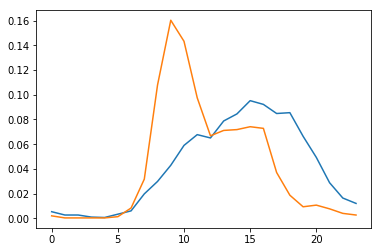

In [37]:
(froyo['order_hour_of_day']
 .value_counts(normalize='columns')
 .sort_index()
 .plot())

(cream['order_hour_of_day']
 .value_counts(normalize='columns')
 .sort_index()
 .plot())

### 2. crosstab

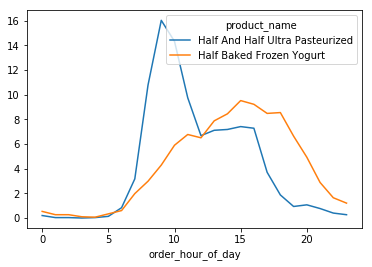

In [38]:
#1st is index, 2nd is column, 3rd is normalize
(pd.crosstab(subset['order_hour_of_day'],
           subset['product_name'],
           normalize='columns')* 100).plot()

### 3. pivot_table

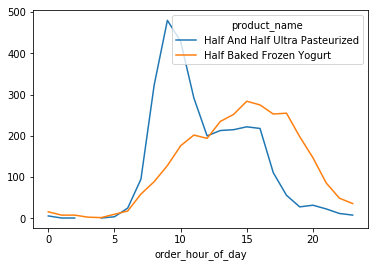

In [39]:
#Default the value is taking the average. We use aggfunc len to use the raw numbers
subset.pivot_table(index='order_hour_of_day',
                  columns='product_name',
                  values='order_id',
                  aggfunc=len).plot();

### 4. melt

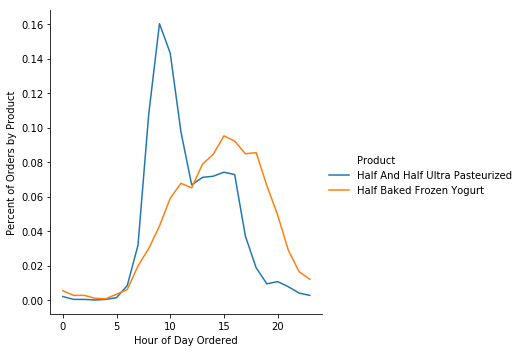

In [40]:
table = pd.crosstab(subset['order_hour_of_day'],
           subset['product_name'],
           normalize='columns')

melted = (table
 .reset_index()
 .melt(id_vars='order_hour_of_day')
.rename(columns={'order_hour_of_day':'Hour of Day Ordered',
                'product_name': 'Product',
                'value': 'Percent of Orders by Product'
                }))

sns.relplot(x='Hour of Day Ordered',
           y='Percent of Orders by Product',
           hue='Product',
           data=melted,
           kind='line')

# ASSIGNMENT
- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
  - Table 2 --> Tidy
  - Tidy --> Table 2

- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [41]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [0]:
#Melt table(long) to pivot table(wide)
flights_pv = flights.pivot_table(index='year', columns='month', values='passengers')
flights_pv

In [42]:
import matplotlib.pyplot as plt
for col in flights_pv.columns:
  sns.distplot(flights_pv[col], axlabel='Passengers', label=col)
plt.legend()

NameError: ignored

# STRETCH OPTIONS

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

#CrossTab Method

In [43]:
merged2 = merged.copy()
merged2.head()

,product_id,product_name,order_id,order_hour_of_day
0,1,Chocolate Sandwich Cookies,1107,11
1,769,Sliced American Cheese,1107,11
2,6184,Clementines,1107,11
3,8048,Packaged Grape Tomatoes,1107,11
4,9007,Frosted Flakes,1107,11


In [44]:
merged2 = merged2.drop(columns=['product_id','order_id'])
merged2.head()

,product_name,order_hour_of_day
0,Chocolate Sandwich Cookies,11
1,Sliced American Cheese,11
2,Clementines,11
3,Packaged Grape Tomatoes,11
4,Frosted Flakes,11


In [46]:
#Crosstab - values are percentages
merged2_ct = pd.crosstab(merged2['order_hour_of_day'], merged2['product_name'], normalize = 'columns')
merged2_ct

product_name,#2 Coffee Filters,#2 Cone White Coffee Filters,#2 Mechanical Pencils,#4 Natural Brown Coffee Filters,& Go! Hazelnut Spread + Pretzel Sticks,'Swingtop' Premium Lager,(70% Juice!) Mountain Raspberry Juice Squeeze,+Energy Black Cherry Vegetable & Fruit Juice,".5\"" Waterproof Tape",0 Calorie Acai Raspberry Water Beverage,...,with Twist Ties Sandwich & Storage Bags,with Xylitol Cinnamon 18 Sticks Sugar Free Gum,with Xylitol Island Berry Lime 18 Sticks Sugar Free Gum,with Xylitol Minty Sweet Twist 18 Sticks Sugar Free Gum,with Xylitol Original Flavor 18 Sticks Sugar Free Gum,with Xylitol Unwrapped Original Flavor 50 Sticks Sugar Free Gum,with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum,with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum,with a Splash of Mango Coconut Water,with a Splash of Pineapple Coconut Water
order_hour_of_day,,,,,,,,,,,,,,,,,,,,,
0,0.003755,0.000000,0.000000,0.012146,0.000000,0.0,0.035714,0.000000,0.125,0.010101,...,0.000000,0.000,0.00,0.000000,0.010417,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.005006,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.125,0.000000,...,0.000000,0.005,0.00,0.000000,0.005208,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.005006,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000,0.000000,...,0.000000,0.000,0.00,0.000000,0.000000,0.000000,0.000000,0.013514,0.000000,0.000000
3,0.001252,0.000000,0.111111,0.000000,0.000000,0.0,0.000000,0.000000,0.000,0.000000,...,0.000000,0.005,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000,0.000000,...,0.000000,0.005,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.001252,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000,0.010101,...,0.000000,0.000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.007509,0.000000,0.000000,0.000000,0.022989,0.0,0.071429,0.000000,0.000,0.010101,...,0.000000,0.000,0.00,0.000000,0.010417,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.035044,0.071429,0.000000,0.032389,0.022989,0.0,0.071429,0.066667,0.000,0.020202,...,0.000000,0.055,0.04,0.037037,0.015625,0.073171,0.017544,0.027027,0.000000,0.000000
8,0.052566,0.071429,0.000000,0.076923,0.063218,0.0,0.107143,0.033333,0.000,0.040404,...,0.045455,0.090,0.08,0.037037,0.015625,0.097561,0.017544,0.054054,0.111111,0.070175


In [47]:
merge2_reset = merged2_ct.reset_index()
merge2_reset

product_name,order_hour_of_day,#2 Coffee Filters,#2 Cone White Coffee Filters,#2 Mechanical Pencils,#4 Natural Brown Coffee Filters,& Go! Hazelnut Spread + Pretzel Sticks,'Swingtop' Premium Lager,(70% Juice!) Mountain Raspberry Juice Squeeze,+Energy Black Cherry Vegetable & Fruit Juice,".5\"" Waterproof Tape",...,with Twist Ties Sandwich & Storage Bags,with Xylitol Cinnamon 18 Sticks Sugar Free Gum,with Xylitol Island Berry Lime 18 Sticks Sugar Free Gum,with Xylitol Minty Sweet Twist 18 Sticks Sugar Free Gum,with Xylitol Original Flavor 18 Sticks Sugar Free Gum,with Xylitol Unwrapped Original Flavor 50 Sticks Sugar Free Gum,with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum,with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum,with a Splash of Mango Coconut Water,with a Splash of Pineapple Coconut Water
0,0,0.003755,0.000000,0.000000,0.012146,0.000000,0.0,0.035714,0.000000,0.125,...,0.000000,0.000,0.00,0.000000,0.010417,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0.005006,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.125,...,0.000000,0.005,0.00,0.000000,0.005208,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,0.005006,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000,...,0.000000,0.000,0.00,0.000000,0.000000,0.000000,0.000000,0.013514,0.000000,0.000000
3,3,0.001252,0.000000,0.111111,0.000000,0.000000,0.0,0.000000,0.000000,0.000,...,0.000000,0.005,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000,...,0.000000,0.005,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,5,0.001252,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000,...,0.000000,0.000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,6,0.007509,0.000000,0.000000,0.000000,0.022989,0.0,0.071429,0.000000,0.000,...,0.000000,0.000,0.00,0.000000,0.010417,0.000000,0.000000,0.000000,0.000000,0.000000
7,7,0.035044,0.071429,0.000000,0.032389,0.022989,0.0,0.071429,0.066667,0.000,...,0.000000,0.055,0.04,0.037037,0.015625,0.073171,0.017544,0.027027,0.000000,0.000000
8,8,0.052566,0.071429,0.000000,0.076923,0.063218,0.0,0.107143,0.033333,0.000,...,0.045455,0.090,0.08,0.037037,0.015625,0.097561,0.017544,0.054054,0.111111,0.070175
9,9,0.073842,0.285714,0.111111,0.105263,0.109195,0.0,0.035714,0.166667,0.250,...,0.045455,0.070,0.18,0.074074,0.151042,0.048780,0.052632,0.108108,0.074074,0.017544


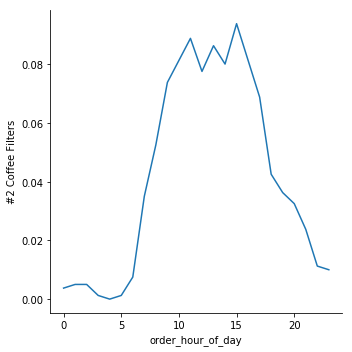

In [48]:
sns.relplot(x='order_hour_of_day', y='#2 Coffee Filters', data=merge2_reset, kind='line')

#Pivot Table Method

In [49]:
merged3 = merged.copy()
merged3.head()

,product_id,product_name,order_id,order_hour_of_day
0,1,Chocolate Sandwich Cookies,1107,11
1,769,Sliced American Cheese,1107,11
2,6184,Clementines,1107,11
3,8048,Packaged Grape Tomatoes,1107,11
4,9007,Frosted Flakes,1107,11
